In [81]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("https://raw.githubusercontent.com/dep1220/analisis_sentimen_capres/main/data_Debat/anies.csv")
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:04:44 +0000 2023,1.735511e+18,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",0.0,0,0.0,0.0,in,797761417894051840,1.735147e+18,MarahIchsan,https://twitter.com/MarahIchsan/status/1735511...
1,1,Fri Dec 15 04:04:33 +0000 2023,1.735511e+18,Suasana pedesaan memang selalu menyenangkan......,0.0,0,0.0,0.0,in,936445409605459968,1.735511e+18,Agung_wiyo,https://twitter.com/Agung_wiyo/status/17355111...
2,2,Fri Dec 15 04:04:31 +0000 2023,1.735511e+18,Program anies hanyalah mengubah nama rumah sak...,0.0,0,0.0,0.0,in,768652236,1.735511e+18,Alfakton_i,https://twitter.com/Alfakton_i/status/17355111...
3,3,Fri Dec 15 04:04:27 +0000 2023,1.735511e+18,@kumparan @aniesbaswedan anies... BERBOHONG DA...,0.0,0,0.0,0.0,in,1710823909275410432,1.735146e+18,justtheway333,https://twitter.com/justtheway333/status/17355...
4,4,Fri Dec 15 04:04:26 +0000 2023,1.735511e+18,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,0.0,0,1.0,1.0,in,1661757337554784264,1.735511e+18,singgihabdrchmn,https://twitter.com/singgihabdrchmn/status/173...


In [83]:
df = df[['full_text','username','created_at']]
df

,full_text,username,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,Tiga untuk Indonesia lebih baik . tag || Gac...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,@herculep638 Makanya susah memahami apa yg dis...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,"Buat Pak Anies ,bukankah anda saat itu yg KD G...",Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,"Anies Baswedan, sosok pemimpin yang memahami b...",YKasmono4,Fri Dec 15 03:36:12 +0000 2023


In [84]:
df

,full_text,username,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,Tiga untuk Indonesia lebih baik . tag || Gac...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,@herculep638 Makanya susah memahami apa yg dis...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,"Buat Pak Anies ,bukankah anda saat itu yg KD G...",Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,"Anies Baswedan, sosok pemimpin yang memahami b...",YKasmono4,Fri Dec 15 03:36:12 +0000 2023


## Cleaning Data

In [85]:
df.shape

(515, 3)

In [86]:
df.duplicated().sum()

2

In [87]:
df.isnull().sum()

full_text     1
username      7
created_at    1
dtype: int64

In [88]:
df = df.drop_duplicates(subset=['full_text'])

In [89]:
df.duplicated().sum()

0

In [90]:
df = df.dropna()

In [91]:
df.isna().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [92]:
df.shape
df

,full_text,username,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,Tiga untuk Indonesia lebih baik . tag || Gac...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,@herculep638 Makanya susah memahami apa yg dis...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,"Buat Pak Anies ,bukankah anda saat itu yg KD G...",Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,"Anies Baswedan, sosok pemimpin yang memahami b...",YKasmono4,Fri Dec 15 03:36:12 +0000 2023


In [93]:
def clean_twiter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r"https?://\S+", '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['full_text'] = df['full_text'].apply(clean_twiter_text)

In [97]:
df['full_text'] = df['full_text'].str.lower()
df

,full_text,username,created_at
0,pastilah prabowo anies nggak punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yg disampaikam anie...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,buat pak anies bukankah anda saat itu yg kd gu...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


## Prepocessing

### Normalisasi

In [100]:
norm = {"yg": "yang", "ganjar": " ", "prabowo": " ", "nggak":"tidak", 'bangetdari': 'banget dari', 'vibes': 'suasana', 'mantab':'keren'}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))

df

,full_text,username,created_at
0,pastilah anies tidakk punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yang disampaikam an...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,buat pak anies bukankah anda saat itu yang kd ...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


### Stopwords

In [101]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['tidak']

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remove_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remove_new.remove(str_text)
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,created_at
0,pastilah anies tidakk punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong nipu rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023


### Tokenize

In [102]:
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0             [pastilah, anies, tidakk, punya, prestasi]
1      [suasana, pedesaan, memang, selalu, menyenangk...
2      [program, anies, hanyalah, mengubah, nama, rum...
3               [anies, berbohong, nipu, rasa, bersalah]
4      [bicara, sesuai, fakta, anies, lantang, sebut,...
                             ...                        
510    [tiga, indonesia, lebih, baik, tag, gacoan, da...
511    [makanya, susah, memahami, apa, disampaikam, a...
512    [buat, pak, anies, bukankah, saat, kd, gubernu...
513    [anies, baswedan, sosok, pemimpin, memahami, k...
514    [anies, baswedan, diharapkan, membawa, perubah...
Name: full_text, Length: 508, dtype: object

### Steming

In [110]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleanning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleanning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('PreprocessingAnies.csv', index=False)

pasti anies tidakk punya prestasi
suasana desa memang selalu senang udara segar rimbun tumbuh hijau sungai jernih penuh ikanikan kecil besar tarik angin dieng gaco adidas semalem bukan ordal anies
program anies hanya ubah nama rumah sakit se indonesia wkwk jungkook is coming olivia gaco daesang bangtan debut karina wonbin batter up 100m views
anies bohong nipu rasa salah
bicara sesuai fakta anies lantang sebut lampung punya alat pantau polusi udara gaco anies gempa daesang pagi batter up 100m views pilih baik
sindir anies baswedan apbd paling besar kok mas anies gagal pimpin jakarta gaco anies gempa daesang pagi batter up 100m views pilih baik
alesan jelas pak anies jelas jelas jelas nyamasih etidak pahamdungu arti
wow mantap sekali ini arti bro anies jadi presiden ri
dulu ajar majas kelas 8 smpsaya paham apa bilang pak anies kalo ga paham mungkin kenyam kelas 8
kasi kiki padahal fakta memang si anies jago kata kata demi tarik simpati padahal implementasi jamin nol cth waktu jd tri gub

In [112]:
data = pd.read_csv('E:\.Developments\DEVELOPMENTS_2024\PROJEK_2024\PROJEK_ANALISIS_CAPRES_NAIVE_BAYES\PreprocessingAnies.csv')
data.head()

,full_text
0,pasti anies tidakk punya prestasi
1,suasana desa memang selalu senang udara segar ...
2,program anies hanya ubah nama rumah sakit se i...
3,anies bohong nipu rasa salah
4,bicara sesuai fakta anies lantang sebut lampun...


In [113]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang='id')
    translation = translator.translate(tweet)
    return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv('english_anies.csv')

### Labeling

In [114]:
data = pd.read_csv('E:\.Developments\DEVELOPMENTS_2024\PROJEK_2024\PROJEK_ANALISIS_CAPRES_NAIVE_BAYES\english_anies.csv', index_col=0)

data.head()

,full_text,tweet_english
0,pasti anies tidakk punya prestasi,anies must have no achievements
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...
3,anies bohong nipu rasa salah,anies lie nipu rasa salah
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...


In [115]:
import preprocessor as p
from textblob import  TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\depro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [120]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []

total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f"Hasil Analisis Data")
print(f"Positif = {total_positif}")
print(f"Negatif = {total_negatif}")
print(f"Netral  = {total_netral}")
print(f"Total Data = {total}")

Hasil Analisis Data
Positif = 441
Negatif = 27
Netral  = 40
Total Data = 508


In [121]:
data['status_kasifikasi'] = status
data

,full_text,tweet_english,status_kasifikasi
0,pasti anies tidakk punya prestasi,anies must have no achievements,Netral
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...,Positif
...,...,...,...
503,tiga indonesia lebih baik tag gaco daesang oli...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
504,makanya susah paham apa disampaikam anies basw...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
505,buat pak anies bukankah saat kd gubernur dki a...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
506,anies baswedan sosok pimpin paham pimpin bukan...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif


### Visualisasi

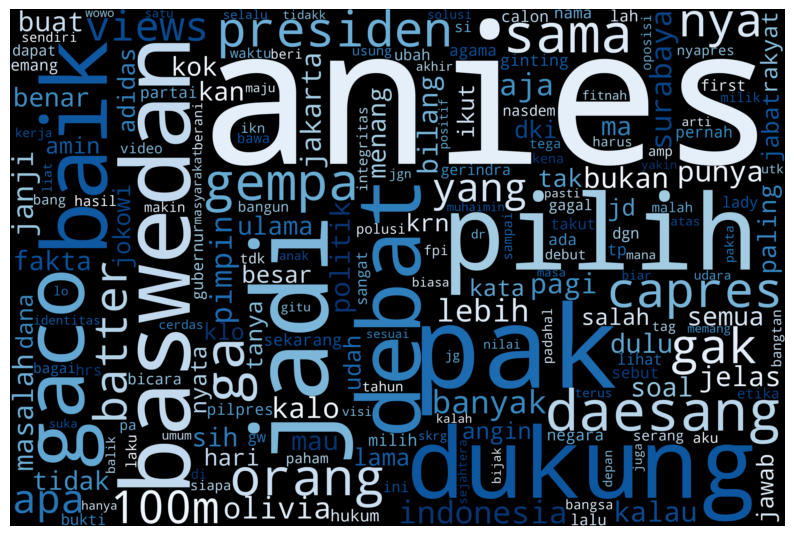

In [150]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(word_cloud):
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweet for tweet in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap = 'Blues_r',
    collocations= False,
    stopwords= STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

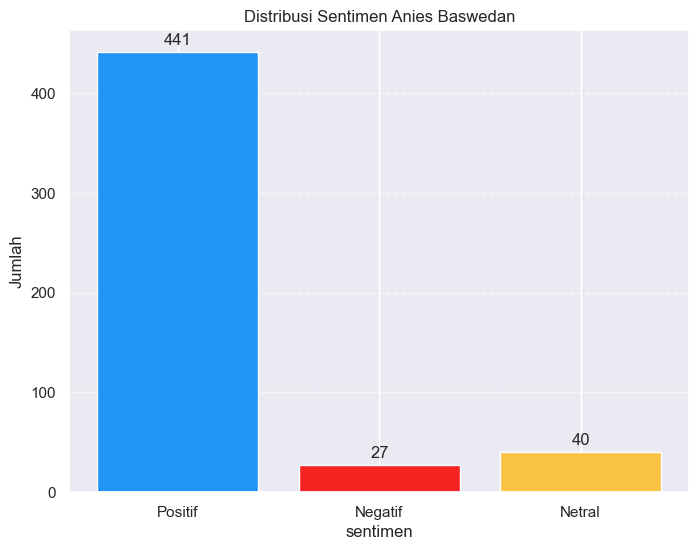

In [152]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']

counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width()/ 2, height),
        xytext =(0,3),
        textcoords='offset points',
        ha='center', va='bottom')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, 'Distribusi Sentimen Anies Baswedan')

### Klasifikasi Sentimen

In [153]:
data

,full_text,tweet_english,status_kasifikasi
0,pasti anies tidakk punya prestasi,anies must have no achievements,Netral
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...,Positif
...,...,...,...
503,tiga indonesia lebih baik tag gaco daesang oli...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
504,makanya susah paham apa disampaikam anies basw...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
505,buat pak anies bukankah saat kd gubernur dki a...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif
506,anies baswedan sosok pimpin paham pimpin bukan...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif


In [154]:
data_set = data.drop(['full_text'], axis=1, inplace=False)
data_set = [tuple(x) for x in data_set.to_records(index=False)]

In [156]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in data_set:
    if(n[1] == 'Positif'):
        set_positif.append(n)
    elif(n[1] == 'Negatif'):
        set_negatif.append(n)
    else:
        set_netral.append(n)


set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)

In [158]:
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(train_set)

print("Akurasi Test: ", cl.accuracy(data_set))

Akurasi Test:  0.8169291338582677


In [160]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Negatif':
        total_negatif += 1
    else:
        total_netral += 1
    
    status.append(analysis.classify())
    total += 1

print("HASIL ANALISIS DATA")
print(f"Positif = {total_positif}")
print(f"Negatif = {total_negatif}")
print(f"Netral = {total_netral}")
print(f"Total Data = {total}")

HASIL ANALISIS DATA
Positif = 508
Negatif = 0
Netral = 0
Total Data = 508


In [161]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
data['klasifikasi_bayes'] = status

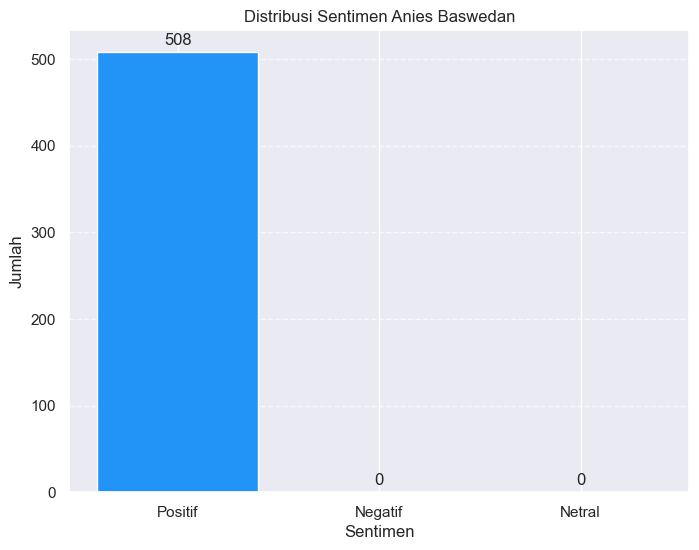

In [162]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']

counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width()/ 2, height),
        xytext =(0,3),
        textcoords='offset points',
        ha='center', va='bottom')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, 'Distribusi Sentimen Anies Baswedan')

In [163]:
data

,full_text,tweet_english,status_kasifikasi,klasifikasi_bayes
0,pasti anies tidakk punya prestasi,anies must have no achievements,Netral,Positif
1,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif,Positif
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral,Positif
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral,Positif
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the fact anies loudly say L...,Positif,Positif
...,...,...,...,...
503,tiga indonesia lebih baik tag gaco daesang oli...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
504,makanya susah paham apa disampaikam anies basw...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
505,buat pak anies bukankah saat kd gubernur dki a...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif
506,anies baswedan sosok pimpin paham pimpin bukan...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,Positif,Positif


In [164]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f"Text: {n[0]}\nClasifier : {n[2]}\nClasifier Bayes : {n[3]} \n")
    else:
        print("Tuple tidak memiliki cukup elemen")

Text: pasti anies tidakk punya prestasi
Clasifier : Netral
Clasifier Bayes : Positif 

Text: program anies hanya ubah nama rumah sakit se indonesia wkwk jungkook is coming olivia gaco daesang bangtan debut karina wonbin batter up 100m views
Clasifier : Netral
Clasifier Bayes : Positif 

Text: anies bohong nipu rasa salah
Clasifier : Netral
Clasifier Bayes : Positif 

Text: sindir anies baswedan apbd paling besar kok mas anies gagal pimpin jakarta gaco anies gempa daesang pagi batter up 100m views pilih baik
Clasifier : Negatif
Clasifier Bayes : Positif 

Text: anak anies cakep bener anak capres muka ga tengil
Clasifier : Netral
Clasifier Bayes : Positif 

Text: partai dukung pak anies tdk tahan jadi oposisinasdem pkb tuh msh yang jabat tri imin msh jabat wakil ketua dprri nampaknya betah banget dgn kekuasaanmundur dong
Clasifier : Negatif
Clasifier Bayes : Positif 

Text: sindir anies baswedan apbd paling besar kok mas anies gagal pimpin jakarta gaco anies gempa daesang pagi batter up 